## BIKE SHARING SYSTEM

### Introduction:
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
> There are 183,412 rows in the dataset with 16 columns. The features are: duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude etc.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
df_tripdata = pd.read_csv('201902-fordgobike-tripdata.csv')

print(df_tripdata.shape)
df_tripdata.head(5)

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Dataset Overview

In [4]:
# high-level overviewStructure of the dataset:

print('The structure of the dataset: ' + str(df_tripdata.shape))

The structure of the dataset: (183412, 16)


In [5]:
# Displays the information about the data set
df_tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# Return the null values for the dataset.
df_tripdata.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# descriptive statistics for numeric variables
df_tripdata.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
# Making a copy of the Dataset
df_tripdata_copy = df_tripdata.copy()

In [9]:
df_tripdata_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [10]:
# Returns the dataset columns
df_tripdata_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [11]:
# Data set shape
df_tripdata_copy.shape

(183412, 16)

In [12]:
# Dropping some columns from the dataset that are not relevance to our exploration.
df_tripdata_copy.drop(columns=['start_station_latitude', 'start_station_longitude'
                      ,'end_station_latitude', 'end_station_longitude'], inplace=True)

In [13]:
# Confirming the column where dropped.
df_tripdata_copy.shape

(183412, 12)

In [14]:
# Confirming the columns where dropped
df_tripdata_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

In [15]:
df_tripdata_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183412 non-null  int64  
 8   user_type                183412 non-null  object 
 9   member_birth_year        175147 non-null  float64
 10  member_gender            175147 non-null  object 
 11  bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


In [16]:
# Converting to the right datatypes

df_tripdata_copy[['start_time', 'end_time']].dtypes

start_time    object
end_time      object
dtype: object

In [17]:
df_tripdata_copy['start_time'] = pd.to_datetime(df_tripdata_copy['start_time'])
df_tripdata_copy['end_time'] = pd.to_datetime(df_tripdata_copy['end_time'])

In [18]:
df_tripdata_copy[['start_time', 'end_time']].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

In [19]:
# Checking for null values
df_tripdata_copy.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
end_station_id              197
end_station_name            197
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [20]:
df_tripdata_copy = df_tripdata_copy.dropna()

In [21]:
df_tripdata_copy.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [22]:
# Converting start_station_id and end_station_id to int

df_tripdata_copy[['start_station_id', 'end_station_id']] = df_tripdata_copy[['start_station_id', 'end_station_id']].apply(np.int64) 

In [23]:
df_tripdata_copy[['start_station_id', 'end_station_id']].dtypes

start_station_id    int64
end_station_id      int64
dtype: object

In [24]:
# Converting the member date of birth from float to int
df_tripdata_copy['member_birth_year'] = df_tripdata_copy['member_birth_year'].apply(np.int64) 

In [25]:
df_tripdata_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  int64         
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  int64         
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns

In [26]:
# Adding a Column to calcculate age from the member birth year:
df_tripdata_copy['member_age'] = df_tripdata_copy.member_birth_year.apply(lambda x: 2019 - x)

In [27]:
# Dropping the member_birth_year column from the dataset
df_tripdata_copy.drop(columns=['member_birth_year'], inplace=True)

In [28]:
# Converting the ride duration from second to minutes:
df_tripdata_copy['duration_min'] = np.ceil(df_tripdata_copy['duration_sec'] / 60).apply(np.int64) 

In [29]:
# Dropping the duration_sec column from the dataset, it no longer needed
df_tripdata_copy.drop(columns=['duration_sec'], inplace=True)

In [30]:
df_tripdata_copy.describe()

,start_station_id,end_station_id,bike_id,member_age,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,139.002126,136.604486,4482.587555,34.196865,12.225210
std,111.648819,111.335635,1659.195937,10.118731,27.371465
min,3.000000,3.000000,11.000000,18.000000,2.000000
25%,47.000000,44.000000,3799.000000,27.000000,6.000000
50%,104.000000,101.000000,4960.000000,32.000000,9.000000
75%,239.000000,238.000000,5505.000000,39.000000,14.000000
max,398.000000,398.000000,6645.000000,141.000000,1410.000000


In [31]:
df_tripdata_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  int64         
 3   start_station_name       174952 non-null  object        
 4   end_station_id           174952 non-null  int64         
 5   end_station_name         174952 non-null  object        
 6   bike_id                  174952 non-null  int64         
 7   user_type                174952 non-null  object        
 8   member_gender            174952 non-null  object        
 9   bike_share_for_all_trip  174952 non-null  object        
 10  member_age               174952 non-null  int64         
 11  duration_min             174952 non-null  int64         
dtypes: datetime64[ns

In [32]:
df_tripdata_copy.shape

(174952, 12)

In [33]:
df_tripdata_copy.head(10)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,Male,No,35,870
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,47,1031
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,Other,No,30,609
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,Male,Yes,45,27
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,Male,No,60,30
6,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,312,San Jose Diridon Station,3803,Subscriber,Female,No,36,20
7,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,127,Valencia St at 21st St,6329,Subscriber,Male,No,30,27
8,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,127,Valencia St at 21st St,6548,Subscriber,Other,No,31,27
9,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,Post St at Kearny St,121,Mission Playground,6488,Subscriber,Male,No,27,18
10,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370,Jones St at Post St,43,San Francisco Public Library (Grove St at Hyde...,5318,Subscriber,Female,Yes,23,8


### What is the structure of your dataset?

> This is the structure of the dataset after the Preliminary Wrangling: (174952, 12)

### What is/are the main feature(s) of interest in your dataset?

> The main Features of interest in the dataset are:
>* duration_min
>* start_time/end_time
>* user_type
>* member_gender
>* member_age

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>* duration_min
>* start_time/end_time
>* user_type
>* member_gender
>* member_age

In [34]:
# Define the base color 
base_color = sb.color_palette()[0]

# Resusable function
def plot_function(title: str, xlabel: str='', ylabel: str='', x_double: bool=False, y_double: bool=False):
    plt.figure(figsize=(18 if x_double else 12, 16 if y_double else 8))
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel , fontsize=15)
    plt.ylabel(ylabel , fontsize=15)

## Univariate Exploration

<!-- ## Question 1: -->
### Riders Gender Distributions

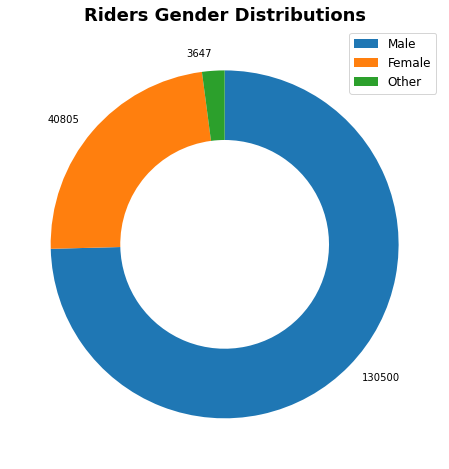

In [35]:
biker_gender = df_tripdata_copy.member_gender.value_counts()
# biker_gender

# Plot
plot_function('Riders Gender Distributions')
plt.pie(biker_gender, labels=biker_gender.values, startangle=90, counterclock = False, wedgeprops = {'width': 0.4});
plt.legend(biker_gender.index, fontsize=12);

>* The riders gender distributions figure clearly show that there are more males riders than the other two combined. 

<!-- ## Question 2: -->
### Riders Membership Type Distribution

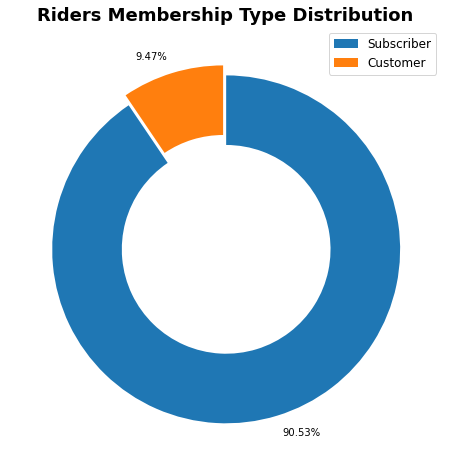

In [36]:

member_count = np.round(df_tripdata_copy.user_type.value_counts(normalize=True)*100,2)

# plot the graph
plot_function('Riders Membership Type Distribution')
plt.pie(member_count, labels=[f'{str(x)}%' for x in member_count.values], startangle=90, counterclock=False, wedgeprops={'width': 0.4}, 
       explode=np.repeat(0.03, len(member_count.index)));
plt.legend(member_count.index, fontsize=12);


>* The riders membership type distribution figure show that most of the riders are subscriber while only about 9% of the riders are customers. 

<!-- ## Question 3: -->
### Bike Share Distribution

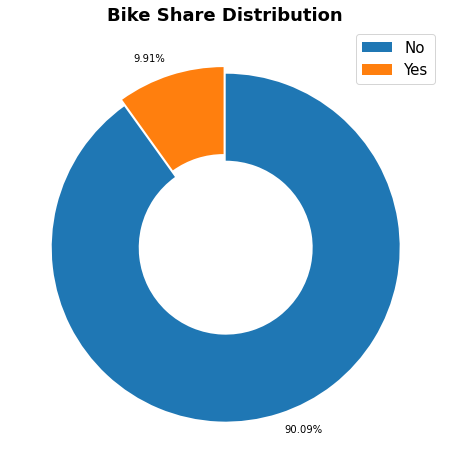

In [38]:
trip_count = np.round(df_tripdata_copy.bike_share_for_all_trip.value_counts(normalize=True) * 100, 2)

plot_function('Bike Share Distribution')
plt.pie(trip_count, labels = [f"{str(x)}%" for x in trip_count.values], startangle = 90, explode=np.repeat(0.02, len(trip_count.index)), counterclock=False, wedgeprops = {'width': 0.5});
plt.legend(trip_count.index, fontsize=15);

>* The bike share distribution show the percentage of one way trib and round trip proportion for the period under study with one having the most percentage of 90%.

## Question 4:
### Bike Count Distribution

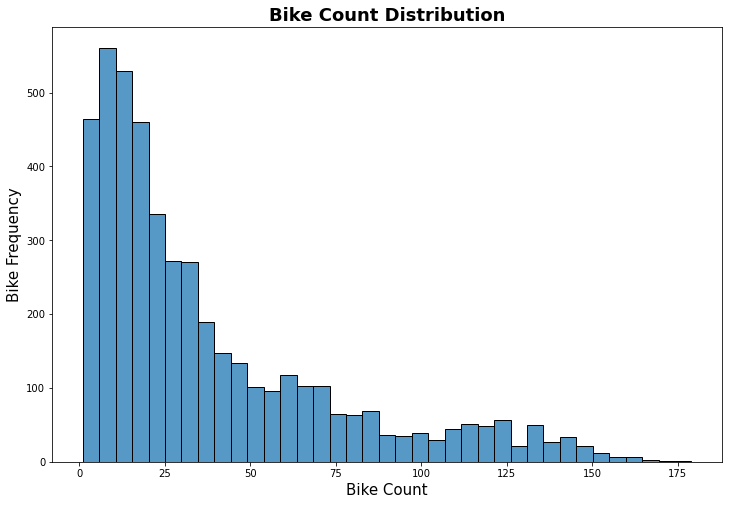

In [37]:
bike_count = df_tripdata_copy.bike_id.value_counts()

plot_function('Bike Count Distribution', 'Bike Count', 'Bike Frequency')
sb.histplot(data=bike_count);

>* The bike count distribution show from the bike frequency axis that the most used bikes are from 0 to 35 on the bike count axis.

In [38]:
df_tripdata_copy.member_age.head()

0    35
2    47
3    30
4    45
5    60
Name: member_age, dtype: int64

<!-- ## Question 5: -->
### Riders Age Distribution

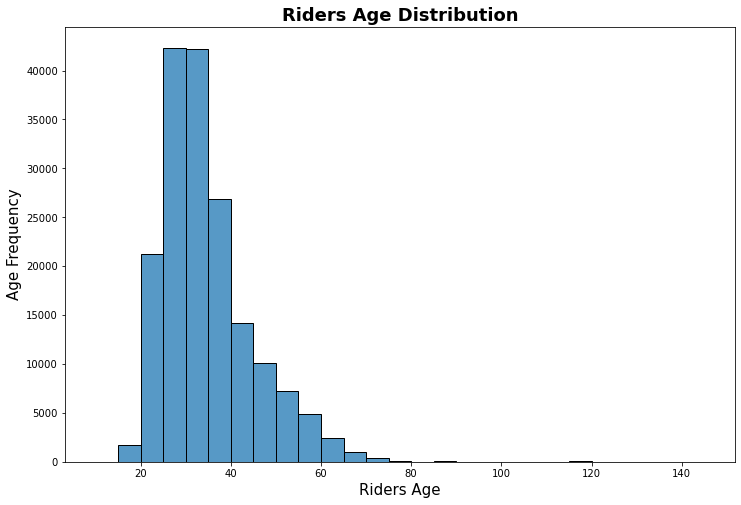

In [39]:
plot_function('Riders Age Distribution', 'Riders Age', 'Age Frequency')
sb.histplot(data=df_tripdata_copy.member_age, bins=range(10, df_tripdata_copy.member_age.max()+5, 5));

>* The riders age distribution figure shows most of the riders falls between the age of 20 and 40, this is clear from the age frequency that shows the frequency is above 40,000.

## Question 6:
### Ride Duration in Minutes Distribution

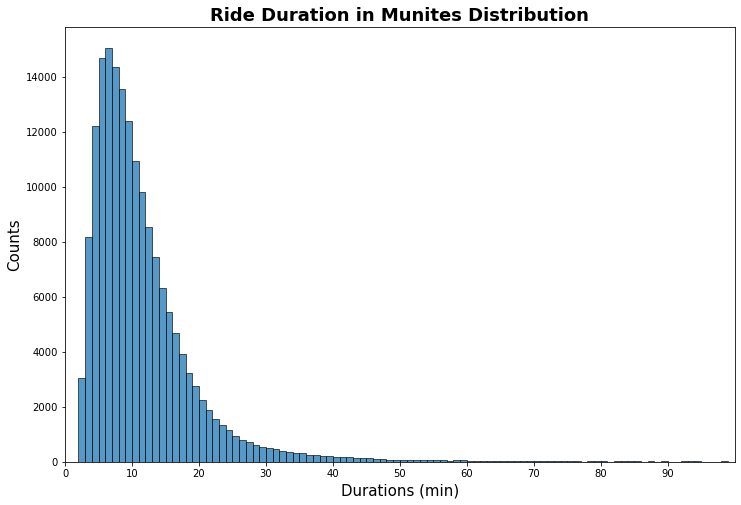

In [40]:
plot_function('Ride Duration in Munites Distribution', 'Durations (min)', 'Counts')
sb.histplot(data=df_tripdata_copy['duration_min'], bins=range(100))
plt.xlim((0, 100))
plt.xticks(ticks=range(0, 100, 10));

>* The ride duration in munites distribution graph shows that the most active duration is between 2 to 20 from the duration axis with its highest peak at about 7 which has the count frequency about 14,000.

In [41]:
df_tripdata_copy.member_age.max()

141

## SUMMARY:
### Univariate Variable of interest:
>* Most of the features that where not in the right data types were converted to appropriate data type that would support the exploration. Start time and End time were converted to datetime from object data type, start station id and end station id were converted from float data type to integer type. member brith year from float type to integer type. 
>* Some features where dropped from the dataset that were not explored, features like start_station_latitude, start_station_longitude.
>* All rows that contains null values were dropped that dataset. 
>* Adding a Column to calcculate age from the member birth year.
>* Converting the ride duration from second to minutes. 
>* Some of the features  contain outliers, like age column which contain maximum age of 141. Nothing were done about the outliers though.


>* The membership type figure show that most of the riders are subscriber while only about 9% of the riders are customers.
>* The riders gender figure clearly show that there are more males riders than the other two combined.
>* The bike count distribution show from the bike frequency axis that the most used bikes are from 0 to 35 on the bike count axis.
>* The riders age distribution figure shows most of the riders falls between the age of 20 and 40, this is clear from the age frequency that shows the frequency is above 40,000.
>* The graph shows that the most active duration is between 2 to 20 from the duration axis with its highest peak at about 7 which has the count frequency about 14,000.

## Bivariate Exploration

## Question 7:
###  Time in Minutes Aganist Member Age 

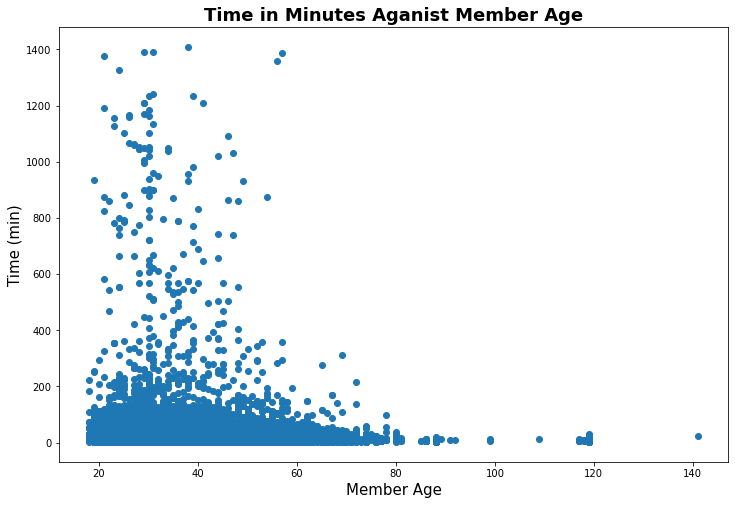

In [41]:
# Scatter plot for duration aganist Age
plot_function('Time in Minutes Aganist Member Age', 'Member Age', 'Time (min)')
plt.scatter(data = df_tripdata_copy, y = 'duration_min', x = 'member_age');
# plt.xlabel('Member Age');
# plt.ylabel('Time cover in miniute');

The time in minutes aganist member age figure which depict the relationship between time and age of the riders show the concentration of riders at the age between 20 to 50 are more active and spent more time riding. 

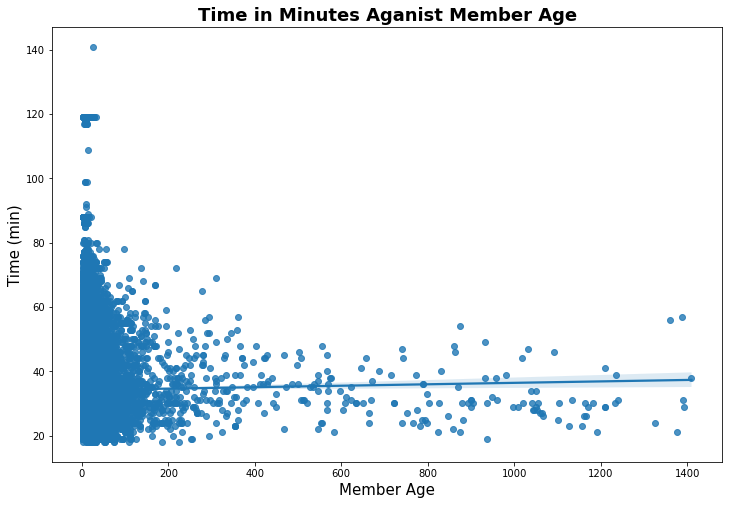

In [42]:
# Scatter plot for duration aganist Age
plot_function('Time in Minutes Aganist Member Age', 'Member Age', 'Time (min)')
sb.regplot(data = df_tripdata_copy, x = 'duration_min', y = 'member_age');
plt.xlabel('Member Age');
plt.ylabel('Time (min)');

>* The relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

## Question 8:
### Start Station Id Aganist End Station Id

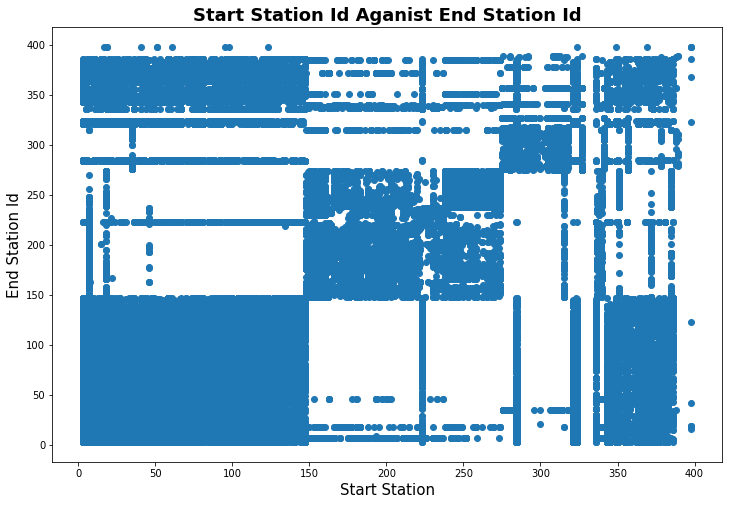

In [44]:
# Scatter plot for Start Station Id aganist End Station Id
# plt.figure(figsize = [10, 7]) 

plot_function('Start Station Id Aganist End Station Id', 'Start Station', 'End Station Id')
plt.scatter(data = df_tripdata_copy, y = 'start_station_id', x = 'end_station_id');
# plt.xlabel('start_station_id');
# plt.ylabel('start_station_id');

>* The correlation between the start station id againist the end station id figure is not very clear but the dip blue colors show the points of intersections of the two id's

## Question 9:
### Start Station Id Aganist End Station Id

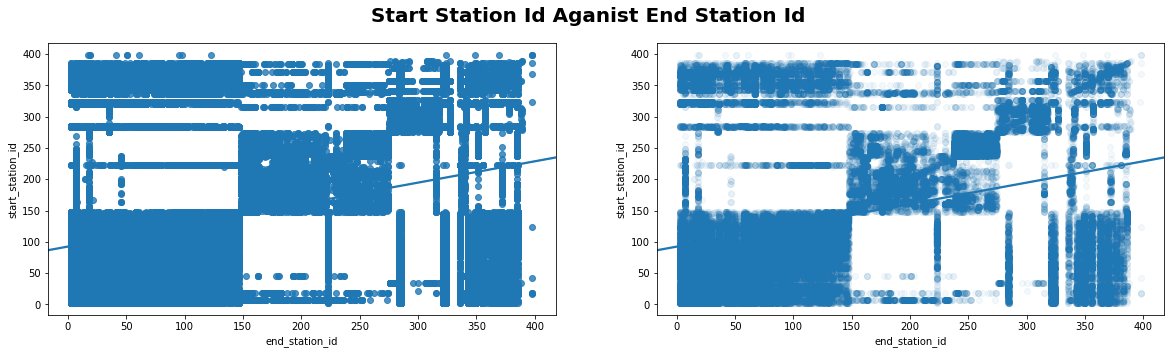

In [45]:
# plot_function('Start Station Id Aganist End Station Id')
plt.figure(figsize = [20, 5])
plt.suptitle('Start Station Id Aganist End Station Id', fontsize=20, fontweight='bold')
# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sb.regplot(data = df_tripdata_copy, y = 'start_station_id', x = 'end_station_id', truncate=False);

plt.subplot(1, 2, 2)

sb.regplot(data = df_tripdata_copy, y = 'start_station_id', x = 'end_station_id', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

> The correlation between the start station id againist the end station id figure is not very clear but the dip blue colors show the points of intersections of the two id's

<!-- ## Question 10: -->
### Duration in Minutes Aganist Member Age.

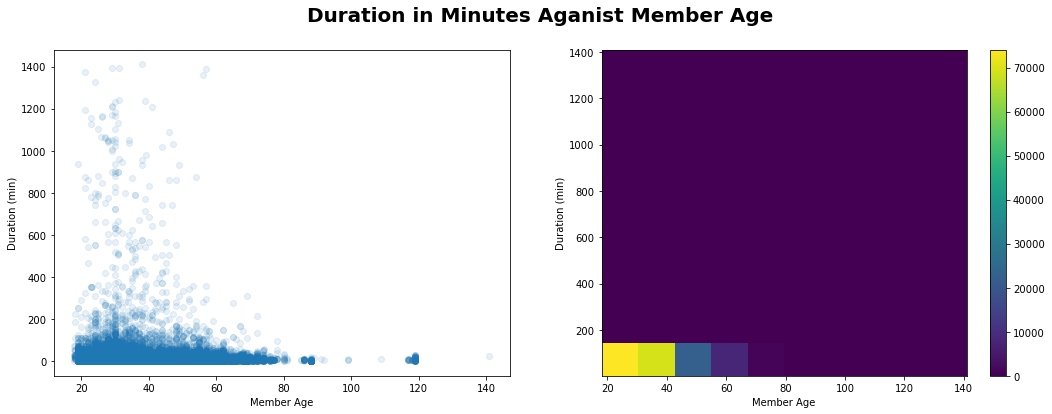

In [43]:
plt.figure(figsize = [18, 6])
plt.suptitle('Duration in Minutes Aganist Member Age', fontsize=20, fontweight='bold')
# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sb.regplot(data = df_tripdata_copy, y = 'duration_min', x = 'member_age', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False);
plt.xlabel('Member Age');
plt.ylabel('Duration (min)');

# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

plt.hist2d(data = df_tripdata_copy, y = 'duration_min', x = 'member_age');
plt.colorbar()
plt.xlabel('Member Age');
plt.ylabel('Duration (min)');

> The correlation between the duration againist the member age figure, the left plot show the member age correlation aganist duration in minute with the dip color. while plot on the right hand is represented with the light color as showen with the legend.

## Question 11:
### Start Station id Aganist End station id.

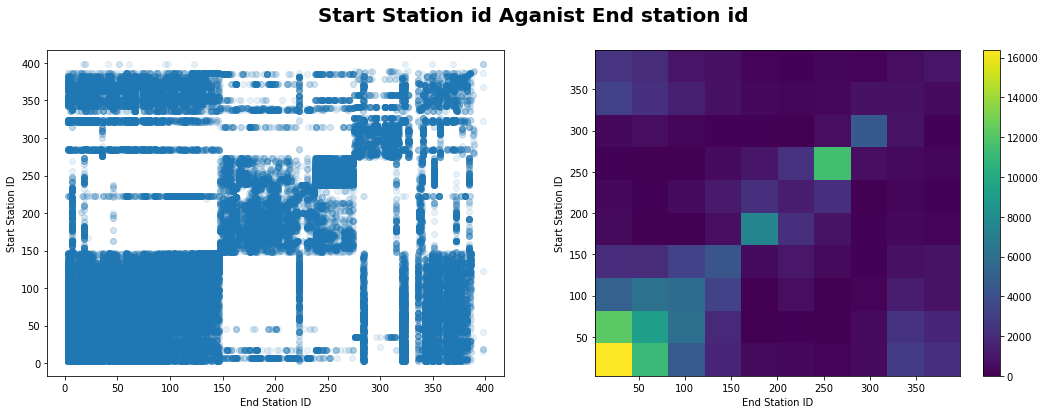

In [44]:
# plot_function('Start Station id Aganist End station id')
plt.figure(figsize = [18, 6])
plt.suptitle('Start Station id Aganist End station id', fontsize=20, fontweight='bold')
# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sb.regplot(data = df_tripdata_copy, y = 'start_station_id', x = 'end_station_id', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False);
plt.xlabel('End Station ID')
plt.ylabel('Start Station ID');

# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

plt.hist2d(data = df_tripdata_copy, y = 'start_station_id', x = 'end_station_id');
plt.colorbar()
plt.xlabel('End Station ID')
plt.ylabel('Start Station ID');

> The correlation between the start station id againist the end station id figure, the left plot show the start station idcorrelation aganist end station id with the dip color. while plot on the right hand is represented with the light color as showen with the legend.

<!-- ## Question 12: -->
### Gender and Age Distribution.

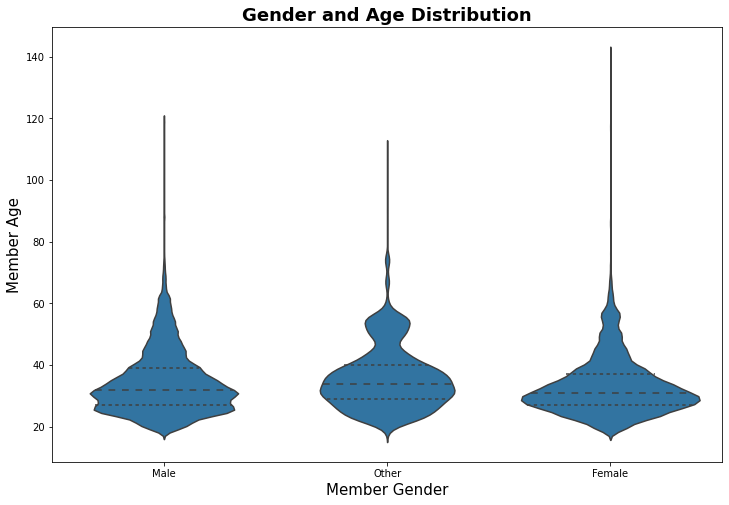

In [45]:
# Relationship between Gender and Age
plot_function('Gender and Age Distribution')
# plt.figure(figsize = [14, 6])
# plt.title('Relationship between Gender and Age',fontsize=20)
sb.violinplot(data = df_tripdata_copy, x = 'member_gender', y = 'member_age', color = base_color, inner="quartile");
plt.xlabel('Member Gender', fontsize=15);
plt.ylabel('Member Age', fontsize=15);

> Gender aganist age distribution figure shows that the members age for the the three membership gender have same mean of about 35. 

In [49]:
df_tripdata_copy.member_age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

<!-- ## Question 14: -->
### Duration in Minutes aganist User Type.

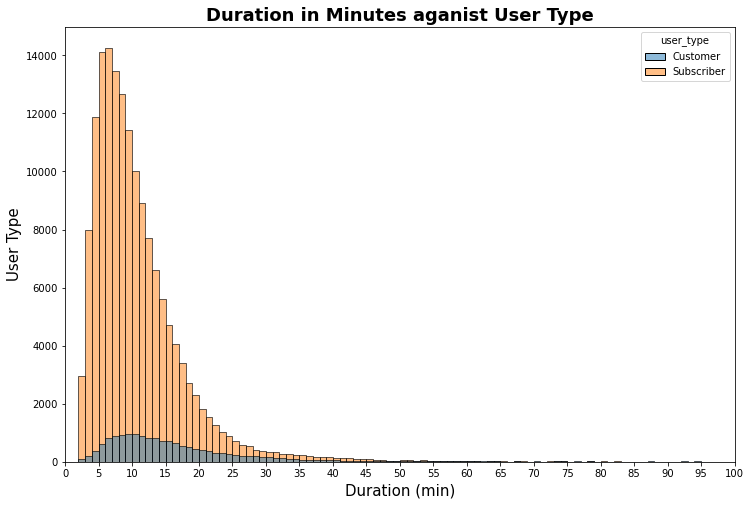

In [50]:
plot_function('Duration in Minutes aganist User Type', 'Duration (min)', 'User Type')
sb.histplot(data=df_tripdata_copy, x='duration_min', hue="user_type", bins=range(101))
plt.xlim((0, 100))
plt.xticks(ticks=range(0, 105, 5));

>* The Duration in Minutes aganist User Type figure clear shows the variation between the User Type aganist Duration in minutes.

## SUMMARY:
### Bivariate Variable of interest:
> The relationship between age of the riders and the duration brought out the age group that does most of the duration (time), which brougth to note that riders between 20 to 40 does the most time.  
> The subscribers user type are about 90% of the riders and they do more time compared to the customer user type that are just 10% of the riders and tend to do shorter time. 
>  
 

## Multivariate Exploration

<!-- ## Question 14: -->
### Gender, Age and User Distribution.

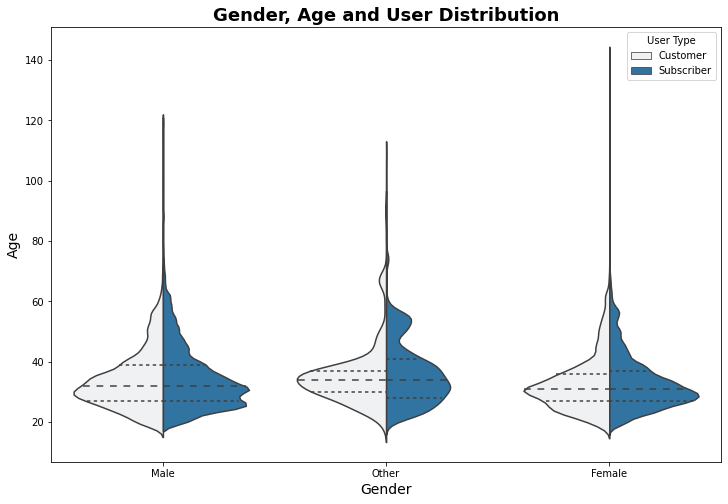

In [46]:
plot_function('Gender, Age and User Distribution','Gender', 'Member Age')
plot = sb.violinplot(data = df_tripdata_copy, x = 'member_gender', y = 'member_age', hue = 'user_type', split = True, inner = 'quartile', color = base_color);
plot.set_xlabel("Gender", fontsize=14)
plot.set_ylabel("Age", fontsize=14)
plt.legend(title="User Type");

>* The male and female gender have same inter quartile while the other gender have different inter quartile but same mean.

## SUMMARY:
### Multivariate Variable of interest:
> The male and female gender have same inter quartile while the other gender have different inter quartile but same mean.
>

## Conclusions
> The dataset under exploration here is the Fordgobike-Tripdata, that did contained 183412 rows and 16 columns. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. There are 183,412 rows in the dataset with 16 columns. Some of the features are as follows duration_sec, start_time, end_time object
start_station_id, the features conssits of different datatypes such as float, integer, datetime and object. Data wranggling was done to set the dataset into proper format for exploration, some features where dropped, rows with missed were also removed and the right data type conversions were done to get the data ready the exploration.
> Some of the finding that was descovered from the dataset are as follows: 
>
>* The membership type figure show that most of the riders are subscriber while only about 9% of the riders are customers.
>* The riders gender figure clearly show that there are more males riders than the other two combined.
>* The bike count distribution show from the bike frequency axis that the most used bikes are from 0 to 35 on the bike count axis.
>* The riders age distribution figure shows most of the riders falls between the age of 20 and 40, this is clear from the age frequency that shows the frequency is above 40,000.
>* The graph shows that the most active duration is between 2 to 20 from the duration axis with its highest peak at about 7 which has the count frequency about 14,000.
>
>* The relationship between age of the riders and the duration brought out the age group that does most of the duration (time), which brougth to note that riders between 20 to 40 does the most time.  
>* The subscribers user type are about 90% of the riders and they do more time compared to the customer user type that are just 10% of the riders and tend to do shorter time. 
>
>* The male and female gender have same inter quartile while the other gender have different inter quartile but same mean.

In [47]:
# Converting to slides
!jupyter nbconvert Part_II_explanation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_explanation.ipynb to slides
[NbConvertApp] Writing 853587 bytes to Part_II_explanation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\Anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\HP\Anaconda3\lib\si